# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [137]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

num_data1 = data1.shape[0]
num_data2 = data2.shape[0]

xx1    = np.zeros(num_data1)
yy1    = np.zeros(num_data1)
label1 = np.zeros(num_data1)

xx2    = np.zeros(num_data2)
yy2    = np.zeros(num_data2)
label2 = np.zeros(num_data2)


for i in range(num_data1):
    xx1[i]    = data1[i,0]
    yy1[i]    = data1[i,1]
    label1[i] = data1[i,2]
    
for j in range(num_data2):
    xx2[j]    = data2[j,0]
    yy2[j]    = data2[j,1]
    label2[j] = data2[j,2]    

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

## define the feature function for each data to obtain the best accuracy

In [140]:
def feature_function1(x, y):
    
    n = x.size
    one = np.ones(shape=(n, ))
    feature = np.column_stack((one, x**2/4, y**2/16))
    
    return feature

In [141]:
def feature_function2(x, y):
   
    n = x.size
    one = np.ones(shape=(n, ))
    feature = np.column_stack((one, x**3 -1.5*x**2 -0.25*x, y))
    
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [142]:
def regression_function(theta, feature):
    
    value = np.dot(feature, theta)
    
    return value

## define sigmoid function with input $x$

In [143]:
def logistic_function(x):
    
    z = 1 / (1 + np.exp(-x))
    
    return z

## define loss function with feature and label based on the logistic regression

In [144]:
def compute_loss_feature(theta, feature, label):
    
    n = feature.shape[0]
    
    h = logistic_function(regression_function(theta, feature))
    
    resi = (-label*np.log(h)) - ((1-label)*np.log(1 - h))
    
    loss = np.sum(resi) / n
    
    return loss

## define gradient vector for the model parameters $\theta$

In [145]:
def compute_gradient_feature(theta, feature, label):
    
    n = feature.shape[0]
    
    h = logistic_function(regression_function(theta, feature))
    
    gradient = feature.T@(h-label)
        
    gradient = gradient / n
    
    return gradient

## compute the accuracy

In [146]:
def compute_accuracy(theta, feature, label):
    
    check = 0
    
    n = label.shape[0]
    for i in range(n):
        f = regression_function(theta, feature[i, :])
        logistic_f = logistic_function(f)
        
        if logistic_f >= 0.5 and label[i]==1:
            check += 1
        elif logistic_f < 0.5 and label[i]==0:
            check += 1
        else:
            pass
        
    accuracy = check / n
   
    return accuracy

## gradient descent for the model parameters $\theta$

In [147]:
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate
theta1 = np.array((0, 0, 0))

theta1_iteration = np.zeros((num_iteration, theta1.size))
loss1_iteration = np.zeros(num_iteration) 

theta2 = np.array((0, 0, 0))

theta2_iteration = np.zeros((num_iteration, theta2.size))
loss2_iteration = np.zeros(num_iteration) 

In [148]:
feature1 = feature_function1(xx1, yy1)
feature2 = feature_function2(xx2, yy2)

for i in range(num_iteration):
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1,feature1, label1)
    loss1 = compute_loss_feature(theta1, feature1, label1)
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature2, label2)
    loss2 = compute_loss_feature(theta2, feature2, label2)
    theta1_iteration[i]= theta1
    loss1_iteration[i] = loss1
    theta2_iteration[i]= theta2
    loss2_iteration[i] = loss2
    

theta1_optimal = theta1
theta2_optimal = theta2

<ipython-input-144-291ff8ecf664>:7: RuntimeWarning: divide by zero encountered in log
  resi = (-label*np.log(h)) - ((1-label)*np.log(1 - h))
<ipython-input-144-291ff8ecf664>:7: RuntimeWarning: invalid value encountered in multiply
  resi = (-label*np.log(h)) - ((1-label)*np.log(1 - h))


## compute accuracy of the classifiers

In [149]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)

## plot the results

In [150]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    
    plt.plot(loss_iteration, '-', color='red')
    
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [151]:
def plot_data(x, y, l):
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
   
    plt.title('data')
    
    xblue = [x[i] for i in range(0, x.size) if l[i]==0]
    xred = [x[i] for i in range(0, x.size) if l[i]==1]
    yblue = [y[i] for i in range(0, x.size) if l[i]==0]
    yred = [y[i] for i in range(0, x.size) if l[i]==1]
    
    plt.plot(xblue, yblue, '.', color = 'blue')
    plt.plot(xred, yred, '.', color = 'red')

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [152]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')
    
    plt.plot(theta_iteration[:,0], '-', color='orange')
    plt.plot(theta_iteration[:,1], '-', color='blue')
    plt.plot(theta_iteration[:,2], '-', color='green')
    

    plt.xlabel('iteration')
    plt.tight_layout()
    plt.show()

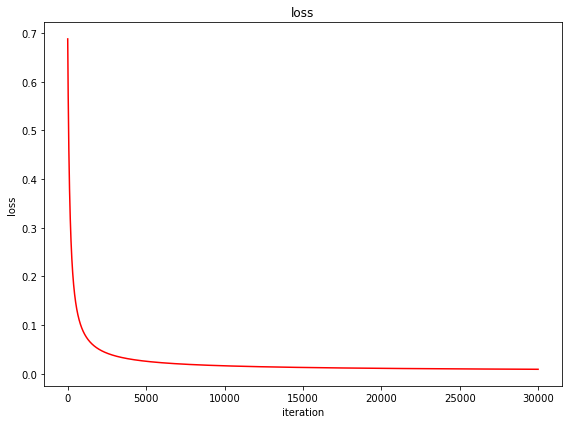

In [153]:
plot_loss_curve(loss1_iteration)

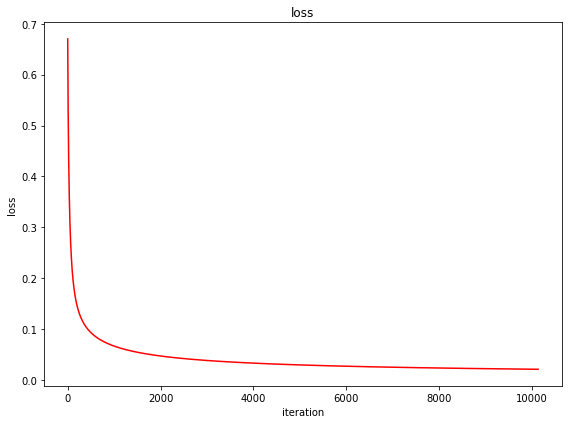

In [154]:
plot_loss_curve(loss2_iteration)

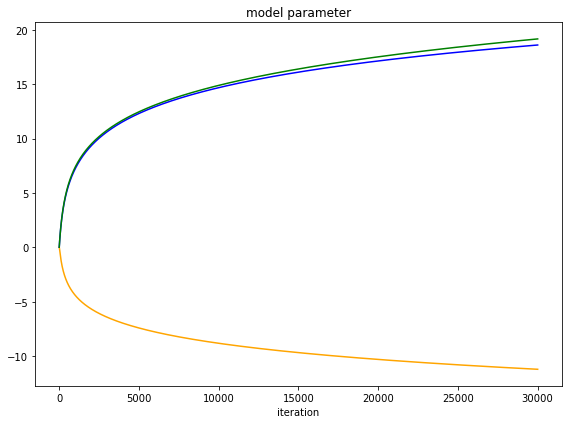

In [155]:
plot_model_parameter(theta1_iteration)

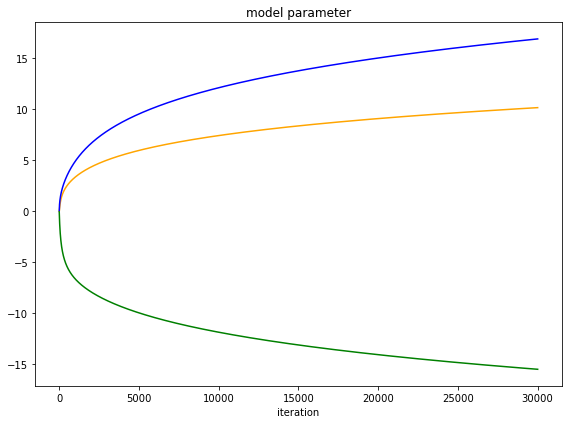

In [156]:
plot_model_parameter(theta2_iteration)

In [157]:
grid_x1 = np.linspace(-4, 4, 1000)
grid_y1 = np.linspace(-5, 5, 1000)
XX1, YY1 = np.meshgrid(grid_x1, grid_y1)

ZZ1 = theta1[0] + theta1[1]*(XX1**2/4) + theta1[2] * (YY1**2/16)

def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('training data')
    
    plt.contourf(XX1, YY1, ZZ1, levels = np.arange(-100, 100,1), cmap = 'coolwarm')
    plt.colorbar()
    
    for i in range(data.shape[0]):
        if data[i,2] == 0:
            plt.plot(xx1[i], yy1[i], '.', color='blue')
        elif data[i,2] == 1:
            plt.plot(xx1[i], yy1[i], '.', color='red')
    
    plt.contour(XX1, YY1, ZZ1, levels=0, colors='black')

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
            

In [158]:
grid_x2 = np.linspace(-2, 3, 1000)
grid_y2 = np.linspace(-3, 3, 1000)
XX2, YY2 = np.meshgrid(grid_x2, grid_y2)

ZZ2 = theta2[0] + theta2[1]*(XX2**3 -1.5*XX2**2 - 0.25*XX2) + theta2[2] * YY2

def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('training data')
    
    for i in range(data.shape[0]):
        if data[i,2] == 0:
            plt.plot(xx2[i], yy2[i], '.', color='blue')
        elif data[i,2] == 1:
            plt.plot(xx2[i], yy2[i], '.', color='red')
    
    plt.contourf(XX2, YY2, ZZ2, levels = np.arange(-300,300,1), cmap = 'coolwarm')
    plt.colorbar()
    
    plt.contour(XX2, YY2, ZZ2, levels=0, colors='black')

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

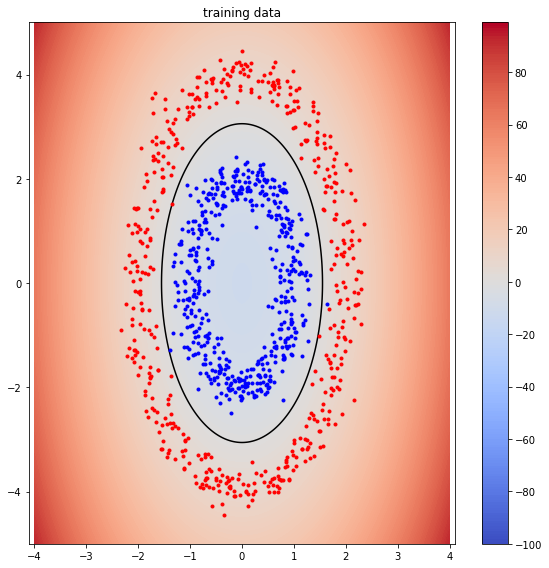

In [159]:
plot_classifier1(data1, theta1_optimal)

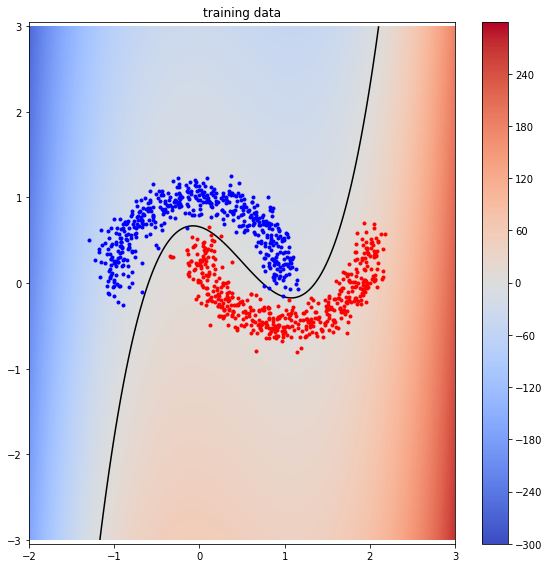

In [160]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

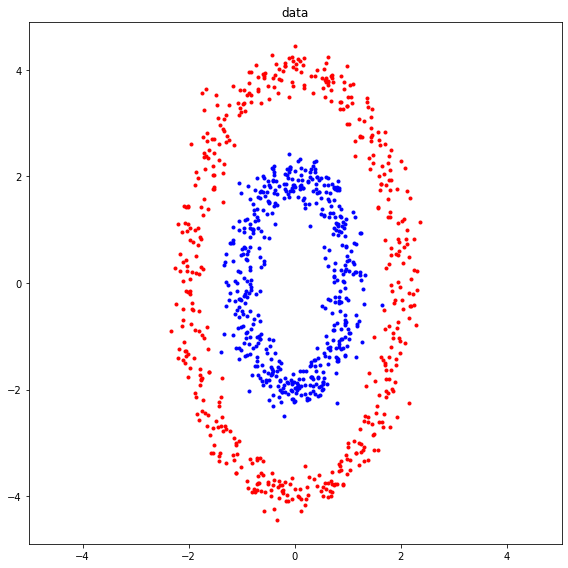

In [161]:
plot_data(xx1, yy1, label1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

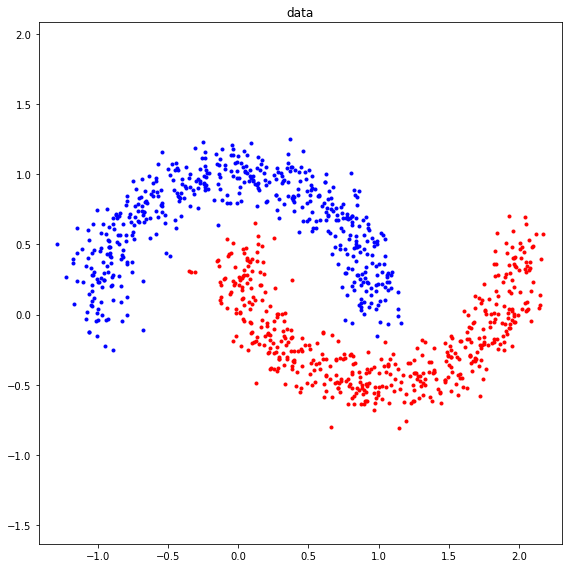

In [162]:
plot_data(xx2, yy2, label2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

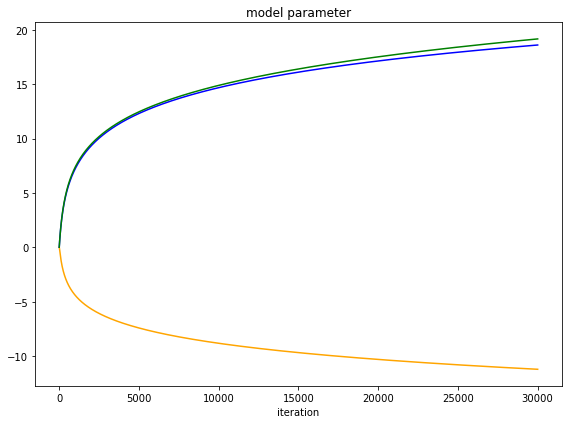

In [163]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

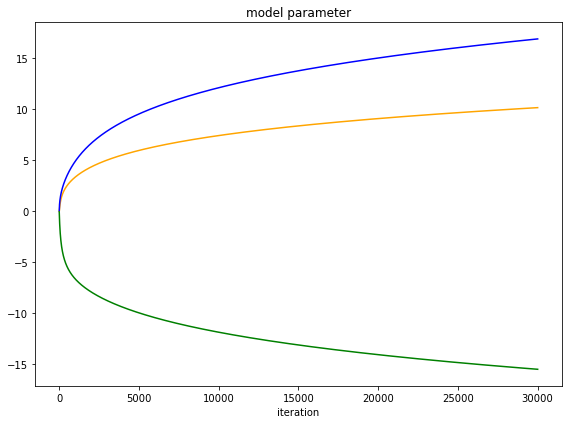

In [164]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

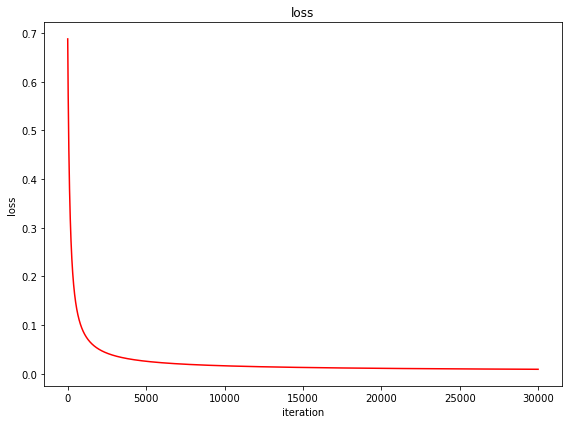

In [165]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

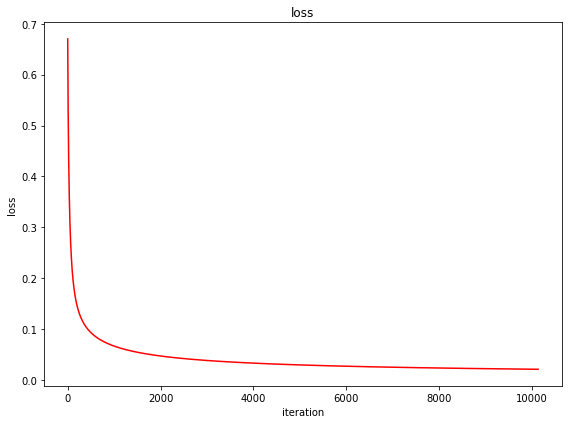

In [166]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

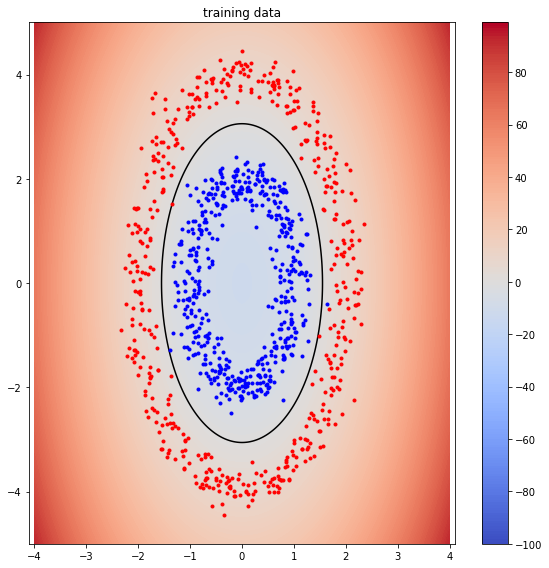

In [167]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

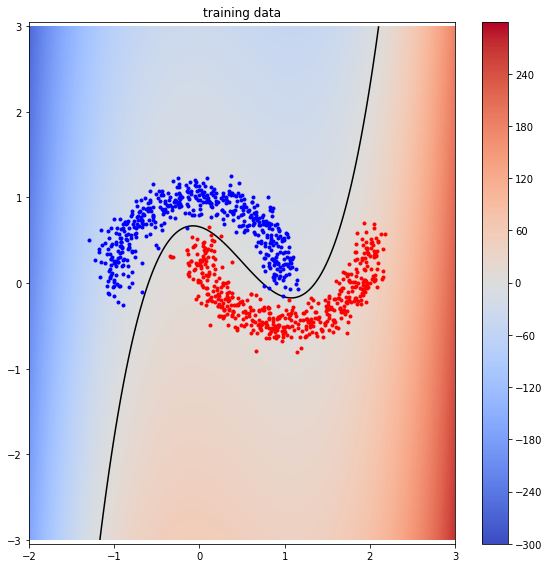

In [168]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [169]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [170]:
print(accuracy_classifier2)

0.996
